### 필요한 모듈 임포트 

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("🌫🛸")

🌫🛸


### 사진 불러오기

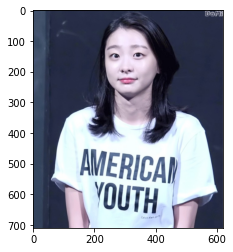

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)# 컬러 이미지는 rgb
plt.show()

### HOG 사용해서 사람 얼굴 찾기

In [3]:
detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 3)  
# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

rectangles[[(216, 106) (382, 272)]]


### 찾은 얼굴 시각화하기

rectangles[[(216, 106) (382, 272)]]


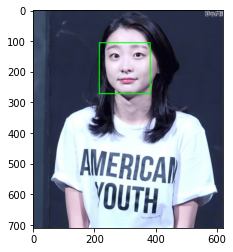

In [4]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### landmark 이용해서 이목구비 찾아내기

In [5]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [6]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


### landmark 사진에 표현하기

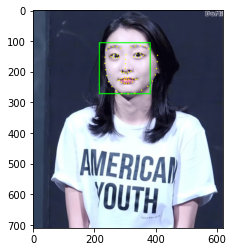

In [7]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 이미지속 코의 중심점 알아보기

In [8]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[57]) # 코의 index는 57 입니다
    x = landmark[57][0]
    y = landmark[57][1] 
    w =  int(dlib_rect.width()*0.7) #사진의 너비를 의미
    h = int(dlib_rect.height()*0.6) #사진의 높이를 의미
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(304, 239)
(x,y) : (304,239)
(w,h) : (116,100)


### 준비해둔 스티커 이미지 적용하기

In [10]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(100, 116, 3)


In [11]:
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (246,139)


In [12]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


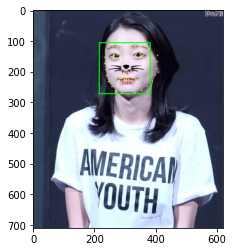

In [13]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### bounding box와 landmark 지우고 최종결과 확인

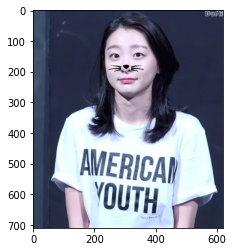

In [14]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 회고 

### 1.이번 프로젝트를 진행하면서 어려웠던점은 스티커 사진을 적용할때 계속해서 뒤에 배경이 지워지지 않는 문제였습  니다. 이 문제를 해결하기 위해 np.where에 대해 알게되었습니다. 또한 루브릭 평가 달성을 위해 노션에 올라와 있는 우수 작품들을 참고해보고 구글링도 해봤지만 아직 제 실력으로는 무리인지 계속 에러가 떠서 이 부분은 달성하지 못하고 그냥 올리게되었습니다. 앞으로는 프로젝트를 하면서 루브릭 평가 목록을 다 해결 할수 있도록 열심히 하겠습니다.
       
            
      
       